In [3]:
# Sentiment Analysis Program of tweets using Python

In [1]:
# import libraries

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Load the Data 

log = pd.read_csv("C:/Users/HP/Desktop/twitter_login.csv")


In [8]:
# Twitter API Credentials

ConsumerKey = log['Key'][0]
ConsumerSecret = log['Key'][1]
AccessToken = log['Key'][2]
AccessTokenSecret = log['Key'][3]


In [9]:
# Create Authentication Object

authenticate = tweepy.OAuthHandler(ConsumerKey,ConsumerSecret)

In [10]:
# Set the Access Token and Access Token Secret

authenticate.set_access_token(AccessToken,AccessTokenSecret)


# Create API object while passing Auth information

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [11]:
# Extract 100 tweets from twitter user

posts = api.user_timeline(screen_name = "Barcelona", count = 100, lang = "en", tweet_mode = "extended")




# Print last 5 tweet from the account

print("Show 5 recent tweets : \n")

i = 1
for tweets in posts[0:5]:
    print(str(i) + ')' + tweets.full_text + '\n')
    i = i+1

Show 5 recent tweets : 

1)@juicelake Due to copyrights, sadly not. Thanks for the love though! There's a few YouTube bootlegs 😏

2)RT @iamkory: Starting the rainy weekend w/ some Saturday morning white vinyl @barcelona vibes 🎶🎶🎶 https://t.co/MTgvouAh6W

3)BASIC MAN on VINYL available now! W/digital download. Orders prior to 12/9 ship before Christmas. Happy Holidays! 

https://t.co/oPqOHRggEy

4)Listen to our new version of "Auld Lang Syne" exclusively on @amazonmusic's #AcousticChristmas playlist! 🌲
https://t.co/R4ZFYxH2Ol

5)RT @anaid1319: @barcelona https://t.co/RavRoEwzF4



In [12]:
# Create a dataframe with column called tweets

df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ["Tweets"])


# Show first 5 rows of data
df.head(5)

,Tweets
0,"@juicelake Due to copyrights, sadly not. Thank..."
1,RT @iamkory: Starting the rainy weekend w/ som...
2,BASIC MAN on VINYL available now! W/digital do...
3,"Listen to our new version of ""Auld Lang Syne"" ..."
4,RT @anaid1319: @barcelona https://t.co/RavRoEwzF4


In [13]:
# Clean the Text

# Create a function to clean the tweets


def clean_txt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)  # Remove # symbol
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','',text)
    return text



# Cleaning the Text

df["Tweets"] = df["Tweets"].apply(clean_txt)




# Show the clean Text

df


,Tweets
0,"Due to copyrights, sadly not. Thanks for the ..."
1,: Starting the rainy weekend w/ some Saturday ...
2,BASIC MAN on VINYL available now! W/digital do...
3,"Listen to our new version of ""Auld Lang Syne"" ..."
4,:
...,...
91,"_14: also in Italy, you are with me! loveyou ..."
92,OH yeah!
93,: I've been listening to for seven years. Pre...
94,: StaffPick Get some 2nd kiss goodness with a...


In [14]:
# Create a function to get Subjectivity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity


# Create two new columns

df["Subjectivity"] = df['Tweets'].apply(get_subjectivity)

df["Polarity"] = df["Tweets"].apply(get_polarity)



# Show new dataframe with the new columns

df

,Tweets,Subjectivity,Polarity
0,"Due to copyrights, sadly not. Thanks for the ...",0.318750,0.050000
1,: Starting the rainy weekend w/ some Saturday ...,0.050000,0.000000
2,BASIC MAN on VINYL available now! W/digital do...,0.381250,0.375000
3,"Listen to our new version of ""Auld Lang Syne"" ...",0.454545,0.170455
4,:,0.000000,0.000000
...,...,...,...
91,"_14: also in Italy, you are with me! loveyou ...",0.200000,-0.300000
92,OH yeah!,0.000000,0.000000
93,: I've been listening to for seven years. Pre...,0.875000,0.159091
94,: StaffPick Get some 2nd kiss goodness with a...,0.000000,0.000000


In [15]:
pd.set_option('display.max_rows',20)

In [16]:
df

,Tweets,Subjectivity,Polarity
0,"Due to copyrights, sadly not. Thanks for the ...",0.318750,0.050000
1,: Starting the rainy weekend w/ some Saturday ...,0.050000,0.000000
2,BASIC MAN on VINYL available now! W/digital do...,0.381250,0.375000
3,"Listen to our new version of ""Auld Lang Syne"" ...",0.454545,0.170455
4,:,0.000000,0.000000
...,...,...,...
91,"_14: also in Italy, you are with me! loveyou ...",0.200000,-0.300000
92,OH yeah!,0.000000,0.000000
93,: I've been listening to for seven years. Pre...,0.875000,0.159091
94,: StaffPick Get some 2nd kiss goodness with a...,0.000000,0.000000


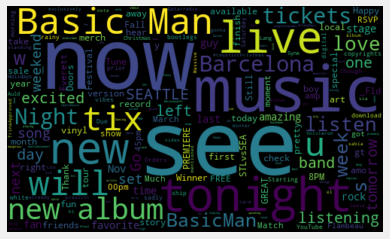

In [39]:
# Plot Word Cloud
all_words = ' '.join(twts for twts in df["Tweets"])
word_cloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(all_words)

plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [40]:
# Create a function to compute positive neutral and negative

def get_analysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
df["Analysis"] = df["Polarity"].apply(get_analysis)


# Show DataFrame

df

,Tweets,Subjectivity,Polarity,Analysis
0,"Due to copyrights, sadly not. Thanks for the ...",0.318750,0.050000,Positive
1,: Starting the rainy weekend w/ some Saturday ...,0.050000,0.000000,Neutral
2,BASIC MAN on VINYL available now! W/digital do...,0.381250,0.375000,Positive
3,"Listen to our new version of ""Auld Lang Syne"" ...",0.454545,0.170455,Positive
4,:,0.000000,0.000000,Neutral
...,...,...,...,...
91,"_14: also in Italy, you are with me! loveyou ...",0.200000,-0.300000,Negative
92,OH yeah!,0.000000,0.000000,Neutral
93,: I've been listening to for seven years. Pre...,0.875000,0.159091,Positive
94,: StaffPick Get some 2nd kiss goodness with a...,0.000000,0.000000,Neutral


In [51]:
# Print all of the Positive Tweets

j = 1 
sorted_df = df.sort_values(by = 'Polarity')

for i in range(0,sorted_df.shape[0]):
    if sorted_df['Analysis'][i] == 'Positive':
        print(str(j) + ')' + sorted_df["Tweets"][i])
        print()
        j = j + 1

1) Due to copyrights, sadly not. Thanks for the love though! There's a few YouTube bootlegs 😏

2)BASIC MAN on VINYL available now! W/digital download. Orders prior to 12/9 ship before Christmas. Happy Holidays! 



3)Listen to our new version of "Auld Lang Syne" exclusively on 's AcousticChristmas playlist! 🌲


4)Our first music video from Basic Man premieres today on : 

5): gonna leave u w/ In The Night by  from the new album Basicman until next week, u take care bye 4 now Qatarradio ht…

6): If I haven't mentioned it already, take note:  's new album BasicMan is out-standing! TrinaApproved 🙌 ♫ 

7): Massive congratulations to our old friends  on their beautiful new album Basic Man. Out now, check it out!

8): Actual footage of me listening to the new Barcelona album right now

BasicMan  

9): Diving in to the new  record BasicMan. Ready to dance, but will probably just end in tears. 

10):  Me listening to Basic Man right now 

11)OUR NEW ALBUM IS OUT TODAY! 

12)Live on  😎 


13)NE

In [56]:
# Print Negative Tweets

j1 = 1
sorted_df1 = df.sort_values(by = 'Polarity',ascending = False)

for i in range(0,sorted_df1.shape[0]):
    if sorted_df1['Analysis'][i] == 'Negative':
        print(str(j1) + ')' + sorted_df1["Tweets"][i])
        print()
        j1 = j1+1
              
            
        
   



1)! See you tonight at 8PM, let's. get. dangerous...

2)_Fld: Seattle indie rock band  will perform at  game on 12/28! STLvsSEA 



3)Only a few days left in our big ol' merch sale!! 

4) 💩 My bad 🙈 We got em at  👊

5): _cfp _hebert @_teeeeraw the awkward moment when chris tweets to  and they're a band or something …

6)_14:  also in Italy, you are with me! loveyou barcelona melodrama fallinlove 



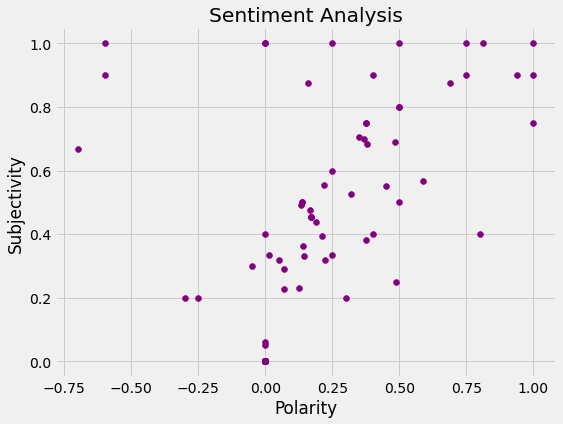

In [57]:
# Plot the Polarity and Subjectivity

plt.figure(figsize = (8,6))

for i in range(0,df.shape[0]):
    plt.scatter(df["Polarity"][i],df['Subjectivity'][i], color = 'Purple')
    
plt.title('Sentiment Analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

plt.show()
    
    

In [63]:
# Get the Percentage of Positive Tweets

p_tweets = df[df["Analysis"] == 'Positive']
p_tweets = p_tweets['Tweets']


round(p_tweets.shape[0]/df.shape[0] * 100,2)

51.04

In [65]:
# Get the Percentage of Negative Tweets

p_tweets = df[df['Analysis'] == 'Negative']
p_tweets = p_tweets["Tweets"]


round(p_tweets.shape[0] / df.shape[0] * 100 , 2)

6.25

In [67]:
# Show the Value Counts

df["Analysis"].value_counts()

Positive    49
Neutral     41
Negative     6
Name: Analysis, dtype: int64

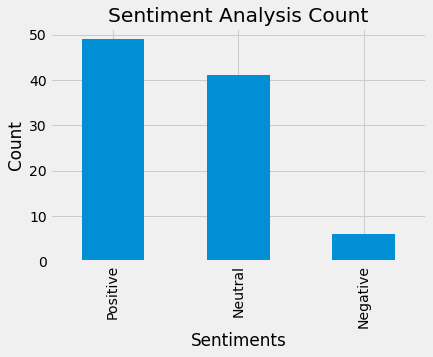

In [89]:
# Plot and Visualize the counts

plt.title("Sentiment Analysis Count")
plt.xlabel("Sentiments")
plt.ylabel("Count")
df["Analysis"].value_counts().plot(kind = 'bar')
plt.show()